### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN','STATUS'])

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [21]:
# Look at APPLICATION_TYPE value counts for binning
application = application_df['ASK_AMT'].value_counts()
application

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

<AxesSubplot:ylabel='Density'>

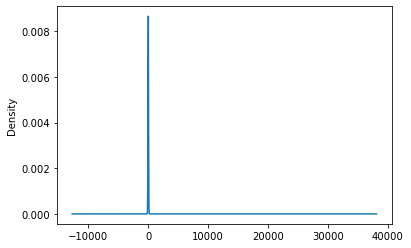

In [22]:
# Visualize the value counts of APPLICATION_TYPE
application.plot.density()

In [33]:
# Determine which values to replace if counts are less than ...?
replace_application = application[application < 5000].index.tolist()

# Replace in dataframe
for app in replace_application:
    application_df.ASK_AMT = application_df.ASK_AMT.astype(str)
    
# Check to make sure binning was successful
application_df.ASK_AMT.value_counts()

5000     25398
Other     8901
Name: ASK_AMT, dtype: int64

In [34]:
# Look at CLASSIFICATION value counts for binning
classification = application_df['ASK_AMT'].value_counts()
classification

5000     25398
Other     8901
Name: ASK_AMT, dtype: int64

<AxesSubplot:ylabel='Density'>

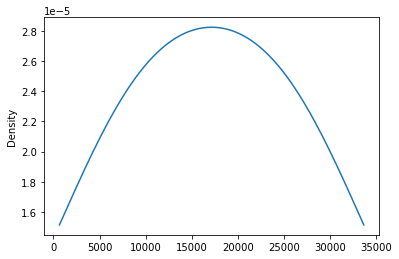

In [35]:
# Visualize the value counts of CLASSIFICATION
classification.plot.density()

In [36]:
# Determine which values to replace if counts are less than ..?
replace_class = classification[classification < 5000].index.tolist()

# Replace in dataframe
for cls in replace_class:
    application_df.ASK_AMT = application_df.ASK_AMT.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.ASK_AMT.value_counts()

5000     25398
Other     8901
Name: ASK_AMT, dtype: int64

In [37]:
# Generate our categorical variable lists
OBJECT = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
OBJECT

['ASK_AMT']

In [38]:
# Create a OneHotEncoder instance
OHE = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(OHE.fit_transform(application_df[OBJECT]))

# Add the encoded variable names to the dataframe
encode_df.columns = OHE.get_feature_names(OBJECT)
encode_df.head()

/Users/adriennezane/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ASK_AMT_5000,ASK_AMT_Other
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0


In [39]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(OBJECT, 1)
application_df.head()

/Users/adriennezane/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,IS_SUCCESSFUL,NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC,NAME_100 BLACK MEN OF AMERICA,NAME_100 BLACK MEN OF MEMPHIS INC,NAME_100 BLACK MEN OF WEST GEORGIA INC,NAME_1150 WEBSTER STREET INC,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,NAME_13TH BOMB SQUADRON ASSOCIATION,NAME_146TH ALUMNI ASSOCIATION,NAME_14TH ARMORED DIVISION,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_5000,ASK_AMT_Other
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [40]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/Users/adriennezane/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [42]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  15
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third Hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 15)                294180    
                                                                 
 dense_5 (Dense)             (None, 10)                160       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 294,401
Trainable params: 294,401
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

In [44]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 8s 8ms/step - loss: 0.5119 - accuracy: 0.7620
Epoch 2/100
804/804 [==============================] - 4s 5ms/step - loss: 0.3513 - accuracy: 0.8459
Epoch 3/100
804/804 [==============================] - 4s 5ms/step - loss: 0.1611 - accuracy: 0.9585
Epoch 4/100
804/804 [==============================] - 4s 5ms/step - loss: 0.1152 - accuracy: 0.9600
Epoch 5/100
779/804 [============================>.] - ETA: 0s - loss: 0.1077 - accuracy: 0.9595
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.1071 - accuracy: 0.9598
Epoch 6/100
804/804 [==============================] - 4s 5ms/step - loss: 0.1007 - accuracy: 0.9614
Epoch 7/100
804/804 [==============================] - 4s 5ms/step - loss: 0.0970 - accuracy: 0.9612
Epoch 8/100
804/804 [==============================] - 4s 5ms/step - loss: 0.0956 - accuracy: 0.9628
Epoch 9/100
804/804 [==============================] -

Epoch 65/100
540/804 [===================>..........] - ETA: 1s - loss: 0.0772 - accuracy: 0.9677
Epoch 65: saving model to checkpoints/weights.65.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.0768 - accuracy: 0.9685
Epoch 66/100
804/804 [==============================] - 7s 8ms/step - loss: 0.0767 - accuracy: 0.9687
Epoch 67/100
804/804 [==============================] - 6s 8ms/step - loss: 0.0764 - accuracy: 0.9682
Epoch 68/100
804/804 [==============================] - 6s 7ms/step - loss: 0.0766 - accuracy: 0.9687
Epoch 69/100
804/804 [==============================] - 6s 7ms/step - loss: 0.0766 - accuracy: 0.9685
Epoch 70/100
517/804 [==================>...........] - ETA: 2s - loss: 0.0764 - accuracy: 0.9678
Epoch 70: saving model to checkpoints/weights.70.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.0762 - accuracy: 0.9684
Epoch 71/100
804/804 [==============================] - 7s 8ms/step - loss: 0.0768 - accuracy: 0.9684
Epoch 72

In [45]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 3s - loss: 11.7596 - accuracy: 0.6225 - 3s/epoch - 10ms/step
Loss: 11.759622573852539, Accuracy: 0.6225072741508484


In [47]:
nn.save("AlphabetSoupCharity_Optimization.HDF5")

INFO:tensorflow:Assets written to: AlphabetSoupCharity_Optimization.HDF5/assets
